# Deep Learning Notes

by zwl

Creative Commons License

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Essential Formulae

Definitions first:

### Logistic Sigmoid

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

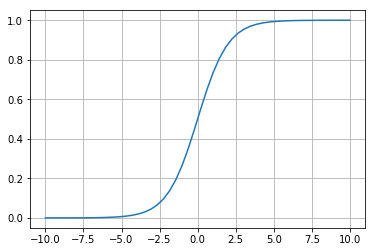

In [13]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

n = np.linspace(-10, 10, 50)
out = sigmoid(n)

plt.plot(n, out)

### Softplus

$$ \zeta(x) = \log(1 + e^x) $$

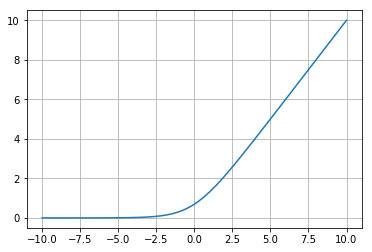

In [14]:
def softplus(x):
    return np.log(1 + np.exp(x))

n = np.linspace(-10, 10, 50)
out = softplus(n)

plt.plot(n, out)

## Properties of Sigmoid & Softplus functions
Derivations for Page 67 formulae. 

### 3.33. 

$$
\begin{aligned}
\sigma(x) =& \frac{e^x}{e^x} \times \frac{1}{1 + e^{-x}} \\
=& \frac{e^x}{e^x(1 + e^{-x})} \\
=& \frac{e^x}{e^x + 1}
\end{aligned}
$$

### 3.34. 

Let $y = e^{-x}$, $z = 1 + y$, then we have $\sigma(x) = z^{-1} $.

$$
\begin{aligned}
\frac{d}{dx}\sigma(x) =& \frac{d\sigma}{dz} \times \frac{dz}{dy} \times \frac{dy}{dx} \\
=& -z^{-2} \times 1 \times -e^{-x} \\
=& -(1 + e^{-1})^{-2} \times -e^{-x} \\
=& \frac{e^{-x}}{(1 + e^{-1})^{2}} \\
=& \frac{1}{1 + e^{-1}} \times \frac{e^{-x}}{1 + e^{-1}} \\
=& \sigma(x) (1-\sigma(x))
\end{aligned}
$$

### 3.35.

$$
\begin{aligned}
1 - \sigma(x) =& 1 - \frac{1}{1 + e^{-x}}\\
=& \frac{1 + e^{-x} - 1}{1 + e^{-x}} \\
=& \frac{e^{-x}}{1 + e^{-x}} \\
=& \frac{1}{e^x + 1} \\
=& \sigma(-x)
\end{aligned}
$$

### 3.36.

$$
\begin{aligned}
\log(\sigma(x)) &= \log\big(\frac{1}{1 + e^{-x}}\big) \\
&= \log(1) - \log(1 + e^{-x}) \\
&= -\log(1 + e^{-x}) \\
&= -\zeta(-x)
\end{aligned}
$$

### 3.37.

Let $u = 1 + e^x$, hence $\zeta(x) = \log(u)$, then

$$
\begin{aligned}
\frac{d}{dx}\zeta(x) =& \frac{d\zeta}{du} \times \frac{du}{dx} \\
&= \frac{1}{u} \times e^x \\
&= \frac{e^x}{1 + e^x} \\
&= \frac{1}{e^{-x} + 1} \\
&= \sigma(x)
\end{aligned}
$$

### 3.38.

**Logit function**, for $ \forall x \in (0, 1)$:

$$ \sigma^{-1}(x) = \log\bigg(\frac{x}{1-x}\bigg) $$

Here the power of -1 does not mean reciprical, but the **inverse**. Eg. given $\sigma(x)$, find $x$. 

$$
\begin{aligned}
\sigma(x) &= \frac{1}{1 + e^{-x}} \\
1 + e^{-x} &= \frac{1}{\sigma(x)} \\
e^{-x} &= \frac{1}{\sigma(x)} - 1 \\
-x &= \log\bigg(\frac{1-\sigma(x)}{\sigma(x)}\bigg) \\
x &= -\log\bigg(\frac{1-\sigma(x)}{\sigma(x)}\bigg) \\
x &= \log\bigg(\frac{\sigma(x)}{1-\sigma(x)}\bigg)
\end{aligned}
$$

In [8]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def logit(x):
    return np.log(x / (1.-x))

logit(.6)

0.40546510810816422

In [12]:
sigmoid(logit(.6))

0.59999999999999998

### 3.39.

Inverse of $\zeta(x)$, let $u=\zeta(x)$:

$$
\begin{aligned}
u &= \log(1 + e^x) \\
e^u &= 1 + e^x \\
e^x &= e^u - 1 \\
\forall x &> 0 \text{, take log on both sides} \\
x &= \log\big( e^u -1 \big)
\end{aligned}
$$

### 3.40.

$$
\begin{aligned}
\int^{x}_{-\infty} \sigma(y)dy &= \int^{x}_{-\infty} \frac{1}{1 + e^{-y}} \\
&= \log \big \lvert 1 + e^{-y} \big \rvert + y \\
&= \log \big ( \frac{e^y + 1}{e^y} \big ) + y \\
&= \log(e^y + 1) - \log(e^y) + y \\
&= \log(e^y + 1)
\end{aligned}
$$

Key here is the integration part. Results can be checked with `SymPy`. Or, to reverse that back:

$$
\begin{aligned}
\frac{d}{dx}\big(\log(1 + e^{-x}) + x\big) &= \frac{1}{1+e^{-x}} \times -e^{-x} + 1 \\
&= \frac{1 + e^{-x} - e^{-x}}{1 + e^{-x}} \\
&= \sigma(x)
\end{aligned}
$$

In [14]:
import sympy as spy

In [16]:
y = spy.Symbol('y')

spy.integrate(1 / (1 + spy.exp(-y)))

y + log(1 + exp(-y))

In [17]:
spy.diff(1 / (1 + spy.exp(-y)))

exp(-y)/(1 + exp(-y))**2

In [18]:
spy.diff(y + spy.log(1 + spy.exp(-y)))

1 - exp(-y)/(1 + exp(-y))

### 3.41

$$
\begin{aligned}
\zeta(x)-\zeta(-x) &= \log(1 + e^x) - \log(1 + e^{-x}) \\
&= \log\bigg(\frac{1 + e^x}{1 + e^{-x}}\bigg) \\
&= \log\bigg(\frac{e^{-x}(1 + e^x)}{e^{-x}(1 + e^{-x})}\bigg) \\
&= \log\bigg(\frac{e^{-x} + 1}{e^{-x}(1 + e^{-x})}\bigg) \\
&= \log\bigg(\frac{1}{e^{-x}}\bigg) \\
&= \log(e^x) \\
&= x
\end{aligned}
$$

## Derivatives

### Softmax Function, p78

$$ softmax(x)_i = \frac{\exp(x_i)}{\sum_{j=1}^{n} \exp(x_j)} $$

Overflow when $x_i$ is very large, underflow when $x_i$ is very negative. Solution is to use $softmax(z)$, where:
$z = x - max_i x_i$.

### Poor Conditioning

Given function $f(x) = A^{-1}x. When $A \in \mathbb{R}^{n\times n} has an **eigenvalue decomposition**, its **condition number** is:

$$ \max_{i,j} \bigg \lvert \frac{\lambda_i}{\lambda_j} \bigg \rvert $$

I.e. Ratio of largest and smallest eigenvalues.

Poor conditioning makes choosing a good optimization step size difficult.

## Hessian Matrix & Min/Max/Saddle Points

At a **critical point** where $\triangledown_x f(x) = 0$:

* **Local minimum** if the Hessian matrix is **positive definite** (i.e. all of its eigenvalues are positive).
* **local maximum** if the Hessian matrix is **negative definite** (i.e. all of its eigenvalues are negative).
* **Inconclusive** if all non-zero eigenvalues have the same sign but **at least one eigenvalue is zero**.



# Chapter 5

**Representational Capacity**, p110, The model specifis which family of functions the learning algorithm can choose from when varying the parameters in order to reduce a training objective. 

**Effective Capacity** can be limited by imperfections of the optimization algorithm, which means it may be less than the representational capacity.

## Vapnik-Chervonenkis (VC) Dimension, p111

VC dimension measres the capacity of a binary classifier. Defined as being the lagest possible value of $m$ for which there exists a training set of $m$ different $x$ points that the classifier can label arbitrarily.

The most important results in statistical learning theory show that the discrepancy between the trainnig error and generalization error is bounded from above by a quantity that grows as the model capacity grows but shrinks as the number of traning examples increase. 

However, this is rarely used in practice when working with deep learning algos. Because:
* it can be quite difficult to determine the capacity of deal learning algos.
* The problem of determining the capacity of deep learning models is especially difficult because the effective capacity is limited by the capabilities of the optimization algorithm. 
* we have little theoretical understanding of the general non-convex optimization problems involved in deep learning.

Typically training error decreases until it asymptotes to the minimum possible error value as model capacity increases (assuming the error measure has a minimum value); generalization error typically has a U-shaped curve as a function of model capacity.

**No Free Lunch theorem**: averaged over all possible data-generating distributions, every classification algothrim has the same error rate when classifying previously unobserved points. 

**Goal** is to understand what kind of distributions are relevant to the real world that an AI agent experiences, and what kind of machine learning algorithem perform well on data drawn from the kinds of data-generating distributions we care about.

## Estimator, Bias and Variance

Sample variance, unbiased sample variance, both underestimates the true standard deviation but are still used in practice. Unbiased sample variance is less of an underestimate. For large sample size $m$, the approximation is quite reasonable.

## Maximum Likelihood Estimation

$$
\begin{aligned}
\theta_{ML} &= \underset{\theta}{\operatorname{arg max}} p_{model}(\mathbb{X}; \theta) \\
&= \underset{\theta}{\operatorname{arg max}}\Pi_{i=1}^{m}p_{model}(x^{(i)}; \theta) \\
&= \underset{\theta}{\operatorname{arg max}}\sum_{i=1}^m \log p_{model}(x^{(i)}; \theta) \\
D_{KL}(\hat{p}_{data} \lVert p_{model}) &= \mathbb{E}_{x \sim \hat{p}_{data}} \bigg[ \log \hat{p}_{data}(x) - \log p_{model}(x)\bigg] \\
\end{aligned}
$$

Therefore minimizing KL divergence corresponds exactly to minimzing the cross-entropy between the distributions.

**Appropriate Conditions** for maximum likelihood estimator to have the property of **consistency**:

* The true distribution $p_{data}$ must lie within the model family $p_{model}(.;\theta)$, otherwise, no estimator can recover $p_{data}$.

* The true distribution $p_{data}$ must corresond to example one value of $\theta$. Otherwise maximum likelihood can recover the correct $p_{data}$ but will not be able to determine which value of $\theta$ was used by the data-generating process.

For large sample size $m$, the **Cramer-Rao lower bound** shows that no consistent estimator has a lower Mean Square Error than the maximum likelihood estimator.'

## Linear Regression as Maximum Likelihood, p130

Gaussian PDF:

$$ PDF(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg) $$

Conditional log-likilihood derivation:

$$
\begin{aligned}
&\sum_{i=1}^{m}\log p(y^{(i)} \mid x^{(i)};\theta) \\
=&\sum_{i=1}^{m}\log\bigg[\big(2\pi\sigma^2\big)^{-1/2}\exp\bigg(-\frac{\lVert\hat{y}^{(i)}-y^{(i)}\rVert^2}{2\sigma^2}\bigg)\bigg] \\
=& \sum_{i=1}^{m}\bigg\{-\frac{1}{2}\log\big(2\pi\sigma^2\big) + \log\bigg[\exp\bigg(-\frac{\lVert\hat{y}^{(i)}-y^{(i)}\rVert^2}{2\sigma^2}\bigg)\bigg]\bigg\} \\
=&\sum_{i=1}^{m}\bigg(-\frac{1}{2}\log\big(2\pi\sigma^2\big)\bigg) - \sum_{i=1}^{m}\frac{\lVert\hat{y}^{(i)}-y^{(i)}\rVert^2}{2\sigma^2} \\
=& -\frac{m}{2}\log\big( 2\pi \big) - m\log\sigma - \sum_{i=1}^{m}\frac{\lVert\hat{y}^{(i)}-y^{(i)}\rVert^2}{2\sigma^2} \\
\end{aligned}
$$

## Bayesian Regression, p134

Likelihood:

$$ p(y \mid X, w) \propto \exp\bigg[-\frac{1}{2}\big(y-Xw\big)^T \big(y-Xw\big)\bigg] $$

Prior:

$$ p(w) \propto \exp\bigg[ -\frac{1}{2}(w-\mu_0)^T\Lambda^{-1}_{0}(w-\mu_0) \bigg] $$

Posterior:

$$
\begin{aligned}
p(w \mid X, y) &\propto p(y \mid X, w)p(w) \\
&\propto \exp\bigg[-\frac{1}{2}\big(y-Xw\big)^T \big(y-Xw\big)\bigg] \exp\bigg[ -\frac{1}{2}(w-\mu_0)^T\Lambda^{-1}_{0}(w-\mu_0)\bigg] \\
&\propto \exp\bigg\{ -\frac{1}{2} \bigg[ y^Ty - y^TXw - w^T X^T y + w^T X^T X w  + w^T \Lambda^{-1}_{0}w - w^T\Lambda^{-1}_{0}\mu_0 -\mu^T_0 \Lambda^{-1}_{0}w + \mu^T_0 \Lambda^{-1}_{0}\mu_0 \bigg] \bigg\} \\
\because &\text{ } y^TXw = w^T X^T y,\text{ } \mu^T_0 \Lambda^{-1}_{0} w = w^T \Lambda^{-1}_{0}\mu_0 \\
\because &\text{ terms without } w \text{ can be ignored} \\
&\propto \exp\bigg\{ -\frac{1}{2} \bigg[-2y^TXw + w^T X^T X w  + w^T \Lambda^{-1}_{0}w - 2\mu^T_0 \Lambda^{-1}_{0}w \bigg] \bigg\} \\
\end{aligned}
$$

By setting:
$$
\begin{aligned}
\Lambda_m &= \big(X^T X + \Lambda^{-1}_0\big)^{-1} \\
\mu_m &= \Lambda_m \big(X^T y + \Lambda^{-1}_0 \mu_0\big) \\
& \therefore \\
\mu^T_m &= \big(X^T y + \Lambda^{-1}_0\mu_0\big)^T \Lambda^T_m  \\
\end{aligned}
$$

Also note $\Lambda^T_m = \Lambda_m$ as $\Lambda_m = diag(\lambda_m)$.

Rewrite posterior:
$$
\begin{aligned}
p(w \mid X, y) &\propto \exp\bigg(-\frac{1}{2}\big(w - \mu_m\big)^T \Lambda^{-1}_m \big(w - \mu_m\big)\bigg) \\
&\propto \exp\bigg\{-\frac{1}{2}\bigg[ w^T\big(X^T X + \Lambda^{-1}_0\big)w - w^T\Lambda^{-1}_m\Lambda_m \big(X^T y + \Lambda^{-1}_0\mu_0 \big) -\big(X^T y + \Lambda^{-1}_0\mu_0 \big)^T\Lambda^T_m\Lambda^{-1}_m w \bigg]\bigg\} \\
&\propto \exp\bigg\{-\frac{1}{2}\bigg[ w^T X^T X w + w^T \Lambda^{-1}_0 w - w^T X^T y - w^T \Lambda^{-1}_0\mu_0 - y^T Xw - \mu^T_0 \Lambda^{-1}_0 w \bigg]\bigg\} \\
&\propto \exp\bigg\{-\frac{1}{2}\bigg[ w^T X^T X w + w^T \Lambda^{-1}_0 w - 2 y^T Xw - 2 \mu^T_0 \Lambda^{-1}_0 w \bigg]\bigg\}
\end{aligned}
$$

If we set $\mu_0 = 0$, $\Lambda_0 = \frac{1}{\alpha} I$, flat prior for covariance:

$$ p(w \mid X, y) \propto \exp\bigg\{-\frac{1}{2}\bigg[ w^T X^T X w + w^T \alpha I w - 2 y^T X w \bigg]\bigg\} $$

This is the form of **ridge regression**, weight decay term $\alpha w^T w$.

## Supervised Learning Algorithms

### K-Nearest Neighbour
* k-nearest neighbour can achieve high capacity. Enables it to obtain high accuracy given a large training set.
* this comes with computational costs
* may generalize very badly given a small training set. 
* It cannot learn that one feature is more discriminative than another.
* Cannot solve a problem where $X\in\mathbb{R}^{100}$ but only $x_1$ is relavent to the output. 

### Decision Trees

It struggles to solve some problems that are easy even for logistic regression, E.g. a 2-class problem and the positive class occurs whenever $x_2 > x_1$.

## Unsupervised Learning Algorithms

Most comment representations:
1. lower-dimensional representation,
2. sparse representation (increase dimension),
3. independent representation.

### PCA

Given design matrix $X$, centered with $\mathbb{E}(x)=0$.

Unbiased Sample Covariance associated with X is:

$$ Var(x) = \frac{1}{m-1}X^T X $$

PCA finds a representation (through orghogonal, linear transformations) $z=W^T x$ where $Var(z)$ is diagonal (implies zero covariance of $z$).

Two ways to find the Principal Components, $W$:

* With Eigenvalue Decomposition: $X^T X = W \Lambda W^T$

* With SVD: $X=U \Sigma W^T$, the **principal components** are the right singular vectors of $X$.

$$
\begin{aligned}
X^T X &= (U \Sigma W^T)^T U \Sigma W^T \\
&= W\Sigma^T U^T U \Sigma W^T \\
\because U \text{ is orthogonal, } U^T U &= I \\
X^T X &= W \Sigma^2 W^T
\end{aligned}
$$

We can show $Var(z)$ is diagonal:

$$
\begin{aligned}
Z &= XW \\
Var(z) &= \frac{1}{m-1} Z^T Z \\
&= \frac{1}{m-1} (XW)^T X W \\
&= \frac{1}{m-1} W^T X^T X W \\
\because X^T X &= W \Sigma^2 W^T \\
Var(z) &= W^T W \Sigma^2 W^T W \\
\because W^T W = I \\
Var(z) &= \Sigma^2 \\
\end{aligned}
$$

## SGD

Uses **minibatch** of $m'$, typically $m'$ ranges from 1 to a few 100s. Crucially, $m'$ is usually held fixed as the training set size $m$ grows.

The number of updates required to reach convergence usually increases with training set size. However, as $m$ approaches infinity, the model will eventually converge to its best possible test error before SGD has sampled every sample in the training set. 

## ML Algo Building Blocks:

Four pieces:
1. dataset
2. cost function
3. optimization procedure
4. model

### Local Constancy & Smoothness Regularization

**Smoothness prior** or **local constancy prior** states that the function we learn should not change very much within a small region.

Relying on this assumption alone fails to solve many deep learning problems. k-means and decision treess all suffer from this problem.

In general, to distinguish $O(k)$ regions in input space, all these methods require $O(k)$ examples. Typically, there are $O(k)$ parameters, with $O(1)$ parameters associated with each of the $O(k)$ regions.

### Manifold Learning

In machine learning, manifold is loosely used to designate a connected set of points that can be approximated well by considering only a small number of degrees of freedom, or dimensions, embedded in a higher-dimensional space. Each direction corresponds to a direction of variation.

# Chapter 6

## Gradient Based Learning

For **feedforward neural nets**, it is important to initialize all weights to **small random numbers**. The biases may be initialized to **zero or to small positive values**. p172.

Unfortunately mean square error and mean absolute error often lead to poor results when used with gradient-based optimization. 

## Sigmoid Output Unit for Bernoulli Output Distribution

Sigmoid output unit is defined by:

$$ \hat{y} = \sigma\big(w^T h + b\big) $$

where $\sigma$ is the logisitc sigmod function, $\hat{y}$ is a scaler. In this case set $z = w^T h + b$.

## Softmax Units for Multinoulli Output Distribution

In this case the model output $\hat{y}$ is a vector, of the following properties:

$$
\begin{aligned}
\forall i, y_i &\in [0, 1] \\
\sum_i y &= 1
\end{aligned}
$$

### Softmax Function

$$ 
\begin{aligned}
\text{softmax}(z)_i &= \frac{\exp(z_i)}{\sum_j \exp(z_j)} \\
\log \text{ softmax}(z)_i &= z_i - \log\sum_j \exp(z_j) \\
\text{softmax}(z) &= \text{softmax}(z - max_i z_i) \text{, this is numerically stable}\\
\end{aligned}
$$

$z$ is defined as:

$$ z = W^T h + b $$

where $W$ is a **matrix**, as oppose to $w$ being a **vector** in the Bernooulli case.

Note that log-softmax **cannot saturate**.

The log-likelihood term $\log\sum_j \exp(z_j)$ can be roughly approximated as $\max_j z_j$. p180. Therefore the intuition is that the negative log-likelihood cost funciton always strongly penalizes the most active incorrect prediction. 

Softmax function can saturate when the difference between input values become extreme. p180. Numerically stable softmax uses the above $\max_j z_j$ approximation. If the cost function is not designed to undo the effects of softmax, it would also saturate when softmax saturates, in which case the gradient vanishes.

In simple form, have $n$ outputs is an **overparameterization**, since $\hat{y}$ sums to 1, we only need to know $n-1$ values. In practice, overparameterization rarely causes much difference and is simpler to implement.

In [26]:
def logsoftmax(z, i):
    log_total = np.log(np.sum(np.exp(z)))
    return z[i] - log_total

def softmax(z, i):
    '''
    Numerically stable softmax.
    '''
    max_z = np.max(z)
    z_mod = z - max_z
    top = np.exp(z_mod[i])
    bottom = np.sum(np.exp(z_mod))
    return top / bottom

def softmax_unstable(z, i):
    top = np.exp(z[i])
    bottom = np.sum(np.exp(z))
    return top / bottom

z = np.zeros(10)
z[0] = 10000
z[1] = 1

i = 0

In [27]:
# this version has overflow problem
print(softmax_unstable(z, i))

nan


/Users/zwl/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in exp
/Users/zwl/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: overflow encountered in exp
/Users/zwl/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


In [28]:
# this version performs well.
print(softmax(z, i))

1.0
